# Strategy Backtesting Using Python (DMP-1)
#### Notebook Created on:  25 Jan 2018
##### Last Update: 30 November 2018
##### Author: Vivek Krishnamoorthy

### Taking stock of where we are currently

We covered quite a bit of ground when we met last. I expect that you would have spent time reviewing it. 

One effective way to learn is to mess with the code I share with you. Tweak the values, create new variables and see what happens. Play around with the cells in the Jupyter Notebook to familiarize yourself with the Python syntax and figure out its features and limitations. **The benefits of running and experimenting with the code I've shared (line by line yourself) *by typing it in* will be a far better use of your time and effort than just reading it.**

There're tons of references I'd provided in my previous class in case you want to delve deeper (I hope you have).

#### Some myths about programming ...

1. It's too late for me to learn it.

2. I need to have an engineering or computer science background to become a quant/algo trader.

3. I will have acquired all the needed knowledge if I go through the EPAT programming oriented sessions.

4. I have to be an expert level programmer to code trading strategies.

#### ... and some truisms

1. It's never too late. The internet is filled with inspiring experiences about people who learnt it quite 'late' in life. Check [this](https://www.google.co.in/search?hl=en&source=hp&ei=P_UpW9yqKcv5vgTs_oXYCw&q=programming+learning+late&oq=programming+learning+late&gs_l=psy-ab.3..0i22i30k1l10.1999.6123.0.6329.27.22.0.3.3.0.279.2152.0j13j1.15.0....0...1c.1.64.psy-ab..9.17.2170.0..0j0i131k1.130.ZbcQA9G_094) out.

2. Not true. To get comfortable with something, it has to start coming naturally to you. This will happen only if you practise everyday. I know I've said this ad nauseum. But really, there's no getting around it. Keep at it and you'll find that it gets easier and more fun.

3. It doesn't take very long to learn programming but months to become an expert. Read widely, watch videos, try stuff, fail, try again (Lather, rinse, repeat).

4. Not true. If you understand financial markets and are familiar with Python or R, you're good to go. The coding community is a vibrant and giving one. You'll find a lot of ninja level programmers actively engaged in troubleshooting and helping newcomers on online forums like [Stackoverflow](https://stackoverflow.com/). Use it when you encounter issues.

#### A handy and step-wise approach to Strategy Testing

1. Come up with a trading/strategy idea (this could come from something you read, or may be a gut instinct that needs to be tested - say, buying at Friday close and selling on the following Monday at market open).

2. Download the relevant data. Daily historical data is usually quite straightfoward to obtain, especially for stocks. Higher frequency data (5 minutely, minutely, etc.) however is expensive and you need to check this with your broker.

3. Think about the algorithm (a series of steps to buy and sell)
    * Build the indicator
    * Create the rule
    * Calculate returns, P & L, etc.
    
4. Do it stepwise and test each part once you write it.

5. Make sure you annotate your code with comments. If not, you'll spend hours trying to understand your own code when you revisit it after a few days.

6. Fragment the code. You don't need to run the data download part every single time. Save the data download part as a function or a separate script/file.

7. Contingency plan
    * What if the code to download data automatically doesn't work?
    * Download the data manually as a csv file and use it instead.


In [ ]:
!conda install pandas-datareader

```python

# The first step when we start to write a Python program is to import all the necessary
# libraries/packages with aliases if required. The aliases I've used are quite standardized 
# in scientific Python code that you come across

import pandas as pd
import numpy as np
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import os

os.getcwd()
os.chdir("C:\Work\EPAT\Python\Strategies") # You'll need to key in the directory relevant to your computer
# Here's where all the files pertaining to your program should be stored
```

In [1]:
import pandas as pd
import numpy as np
import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import os

[pandas-datareader](http://pandas-datareader.readthedocs.io/en/latest/) is a popular library (other libraries include [quandl](https://www.quandl.com/tools/python), [nsepy](http://nsepy.readthedocs.io/en/latest/) etc.) used to pull financial data automatically from different web sources. However, the data sources often change and one needs to check the documentation from time to time to be updated. A few months ago, I would always download whatever data I needed through Yahoo Finance or Google Finance (when using `pandas-datareader`). They don't work anymore.

### A short detour - Dates and Times in Python

In Python ,there are a number of ways to represent dates, times, and time intervals between them. `pandas` and `NumPy` have their own ways of representing them. We will be mostly dealing with the `pandas` date formats since that is most relevant to quantitative finance. Nevertheless, it's useful to know how they relate with each other.

Two important methods within `datetime` which are also the same in `pandas` are `strptime` and `strftime`.
* `strptime` parses a string and **converts it to a `datetime` object**.
* `strftime` **converts a `datetime` object to a specified format string**.

As a mnemonic, I find it helpful to link the `p` in `strptime` to
* *parsing* a string to get a datetime object. 

And the `f` in `strftime` to 
* *formatting*  a `datetime` object to get a formatted string of our choice.

*I'd strongly suggest that you go through the use cases for these two methods and try them out (even if you don't try out the rest of the code pertaining to dates and times). Dealing with different formats of dates and times from disparate source files (since data could come from many potential data providers) is a pain we often encounter while dealing with financial data. [Here's](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) the official documentation on them.*

Native Python has a built-in `datetime` library and a third-party library [`dateutil`](https://dateutil.readthedocs.io/en/stable/) which supplies `date`, `datetime`, `time`, `timedelta` and other objects. There are many useful functionalities that you can perform using them. However, while working with large datasets, they are inefficient compared to better available date formats in `pandas` or `NumPy`.

`NumPy` has the `datetime64` data type which encodes dates as 64-bit integers. It's named so because the name `datetime` was already taken by the `datetime` library in native Python. Some of the objects follow the convenient nomenclature of `64` suffixed at the end of their native Python names. Ex. `datetime64`, `timedelta64`.

`pandas` provides a `Timestamp` object which is like the best of both worlds. It's got the user-friendliness of `datetime` and `dateutil` and the efficiency of `NumPy's datetime64`. It is interchangeable with Python's `datetime` in most cases.

**`DatetimeIndex` is a `pandas` index object formed by combining multiple entries of `Timestamp` objects.**

***Some use cases which you can try on your own time if you wish.***

```python
## Native Python
import datetime
a = datetime.datetime(year=2018, month=6, day=10)
print("a = ", a, type(a))

a2 = datetime.datetime.now()
print("a2 = ", a2, type(a2))

a3 = datetime.datetime.now().date()
print("a3 = ", a3, type(a3))

a3.strftime("%A")
a2.strftime("%a")

a4date = "18 Nov 2011"
a4 = datetime.datetime.strptime(a4date,"%d %b %Y").date()

from dateutil import parser
a5 = parser.parse("10th Oct 2014")
a5
print("a5 = ", a5, type(a5))
```

In [2]:
import datetime

In [3]:
a = datetime.datetime(year=2018, month=6, day=10)

In [7]:
type(a)

datetime.datetime

In [8]:
import datetime
a = datetime.datetime(year=2018, month=6, day=10)
print(a, "a", type(a))

2018-06-10 00:00:00 a <class 'datetime.datetime'>


In [7]:
a2 = datetime.datetime.now()
print("a2 = ", a2, type(a2))

a3 = datetime.datetime.now().date()
print("a3 = ", a3, type(a3))

a2 =  2018-11-30 14:04:43.374000 <class 'datetime.datetime'>
a3 =  2018-11-30 <class 'datetime.date'>


In [10]:
a2 = datetime.datetime.now()

In [12]:
a3 = datetime.datetime.now().date()

In [13]:
a3

datetime.date(2018, 12, 1)

In [6]:
print("a = ", a, type(a))

a =  2018-06-10 00:00:00 <class 'datetime.datetime'>


In [15]:
a3.strftime("%A") # a shortform for the day (complete spelling)

'Saturday'

In [16]:
a2.strftime("%a") 

'Sat'

In [17]:
a2.strftime("%d %b %Y") 

'01 Dec 2018'

In [18]:
a4date = "18 Nov 2011"
a4 = datetime.datetime.strptime(a4date,"%d %b %Y").date()

In [20]:
from dateutil import parser
a5 = parser.parse("10th Oct 2014")
a5
print("a5 = ", a5, type(a5))

a5 =  2014-10-10 00:00:00 <class 'datetime.datetime'>


In [ ]:
a2 = datetime.datetime.now().date()

In [ ]:
from dateutil import parser

In [21]:
type(parser.parse("15th Sep 2016"))

datetime.datetime

```python
## NumPy Datetimes

import numpy as np
b = np.datetime64("2016-04-15")

b2 = np.datetime64("2017-11") # only specifying month and year

b3 = np.arange('2015-08', '2015-09', dtype='datetime64[D]') # getting all the dates for a month

np.datetime64('2018-01-01') + np.timedelta64(25, 'D')
```

In [18]:
b = np.datetime64("2016-04-15")

In [19]:
b

numpy.datetime64('2016-04-15')

In [20]:
b2 = np.datetime64("2017-11") # only specifying month and year

In [21]:
b2

numpy.datetime64('2017-11')

In [22]:
import numpy as np
b = np.datetime64("2016-04-15")

In [23]:
b

numpy.datetime64('2016-04-15')

In [24]:
b2 = np.datetime64("2017-11") # only specifying month and year

In [25]:
b2

numpy.datetime64('2017-11')

In [22]:
b3 = np.arange('2015-08', '2015-09', dtype='datetime64[D]') # getting all the dates for a month

In [23]:
b3

array(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
       '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
       '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
       '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
       '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
       '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
       '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
       '2015-08-29', '2015-08-30', '2015-08-31'], dtype='datetime64[D]')

In [28]:
np.datetime64('2018-01-01') + np.timedelta64(25, 'D')

numpy.datetime64('2018-01-26')

In [24]:
len(b3)

31

```python
## pandas Timestamps

import pandas as pd

c = pd.to_datetime("10th Sept 2016")
c
print("c", type(c))
c.strftime("%B")

c2 = c + pd.to_timedelta(np.arange(20), 'D')
c2
print("c2", type(c2))

c3 = pd.Timestamp('2017-03-15')
c3
print("c3", type(c3))

```

You can read and try some examples on this from [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html).

In [29]:
c = pd.to_datetime("November 1 17")

In [30]:
c

Timestamp('2017-11-01 00:00:00')

In [31]:
type(c)

pandas._libs.tslib.Timestamp

In [35]:
c.strftime("%d %B %y")

'01 November 17'

In [36]:
c2 = c + pd.to_timedelta(np.arange(20), 'D')
c2
#print("c2 = ", c2, type(c2))

DatetimeIndex(['2017-11-01', '2017-11-02', '2017-11-03', '2017-11-04',
               '2017-11-05', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12',
               '2017-11-13', '2017-11-14', '2017-11-15', '2017-11-16',
               '2017-11-17', '2017-11-18', '2017-11-19', '2017-11-20'],
              dtype='datetime64[ns]', freq=None)

In [37]:
c3 = pd.Timestamp('2017-03-15')

In [40]:
c3

Timestamp('2017-03-15 00:00:00')

### Downloading and loading the data in a pandas DataFrame

We will now use the `pandas-datareader` to automatically download the required data for the Microsoft stock price. In case you're having trouble with the download, please use the `csv` file that's been provided to you and run the relevant code.


```python

end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 10)
df = web.DataReader("MSFT", "quandl", start, end)

## IMPORTANT: Please run the below line only if your pandas-datareader doesn't work

df = pd.read_csv("MSFT.csv", index_col=0, parse_dates=True)

```

In [38]:
end = datetime.datetime.now().date()
#end = pd.to_datetime("1st Aug 2018")
start = end - pd.Timedelta(days = 365 * 10)

In [40]:
start, end

(datetime.date(2008, 12, 3), datetime.date(2018, 12, 1))

In [45]:
%time df = web.DataReader("MSFT", "quandl", start, end)

Wall time: 3.08 s


In [55]:
df.to_csv("MSFT.csv") #this is to save a downloaded file as a csv file

In [43]:
df = pd.read_csv("MSFT.csv", index_col=0, parse_dates=True)

In [46]:
df.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2008-12-09,20.62,21.25,20.46,20.60,80484900.0,0.0,1.0,16.371163,16.871349,16.244132,16.355284,80484900.0
2008-12-08,20.35,21.25,20.14,21.01,107225000.0,0.0,1.0,16.156798,16.871349,15.990069,16.680802,107225000.0
2008-12-05,18.91,19.98,18.47,19.87,91996200.0,0.0,1.0,15.013516,15.863038,14.664180,15.775704,91996200.0
2008-12-04,19.40,19.92,18.79,19.11,78719200.0,0.0,1.0,15.402549,15.815401,14.918242,15.172305,78719200.0
2008-12-03,18.65,19.90,18.60,19.87,80961500.0,0.0,1.0,14.807090,15.799522,14.767393,15.775704,80961500.0


Let's now examine `df`, our `pandas DataFrame` closely.

```python

df.head()
df.tail()
df.shape
df.describe()
df.info()
```

In [47]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0


In [48]:
df.shape

(2343, 12)

In [49]:
df.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,2343.000000,2343.000000,2343.000000,2343.000000,2.343000e+03,2343.000000,2343.0,2343.000000,2343.000000,2343.000000,2343.000000,2.343000e+03
mean,40.520195,40.871523,40.170986,40.540329,4.489336e+07,0.003863,1.0,37.253141,37.573103,36.934689,37.271378,4.489336e+07
std,17.651417,17.758138,17.531638,17.649341,2.529837e+07,0.033052,0.0,18.924686,19.046591,18.790286,18.923382,2.529837e+07
min,15.200000,15.620000,14.870000,15.150000,7.425503e+06,0.000000,1.0,12.154701,12.490554,11.890816,12.114718,7.425503e+06
25%,27.050000,27.260000,26.765000,27.025000,2.742071e+07,0.000000,1.0,22.843016,23.075755,22.554106,22.817523,2.742071e+07
50%,33.480000,33.900000,33.260000,33.640000,3.982610e+07,0.000000,1.0,29.920808,30.225300,29.726584,29.980012,3.982610e+07
75%,50.440000,50.800000,49.820000,50.435000,5.558070e+07,0.000000,1.0,48.511141,48.981096,47.940567,48.388455,5.558070e+07
max,97.000000,97.240000,96.040000,96.770000,3.193179e+08,0.420000,1.0,97.000000,97.240000,96.040000,96.770000,3.193179e+08


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2343 entries, 2018-03-27 to 2008-12-03
Data columns (total 12 columns):
Open          2343 non-null float64
High          2343 non-null float64
Low           2343 non-null float64
Close         2343 non-null float64
Volume        2343 non-null float64
ExDividend    2343 non-null float64
SplitRatio    2343 non-null float64
AdjOpen       2343 non-null float64
AdjHigh       2343 non-null float64
AdjLow        2343 non-null float64
AdjClose      2343 non-null float64
AdjVolume     2343 non-null float64
dtypes: float64(12)
memory usage: 238.0 KB


You'll notice that sometimes the order of entries is from the latest to the oldest. This is the way in which data gets downloaded via Quandl. We will encounter quirks such as these with different data vendors. And a significant part of our job when we work on programming quant trading strategies, is data munging and cleaning.

```python
# We reindex our dataframe so as to get the data ordered the way we'd prefer

df = df.reindex(index=df.index[::-1])
# df = df[::-1] # this also works
df.head()
df.tail()

```

In [51]:
df = df[::-1]

In [52]:
df.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2008-12-03,18.65,19.90,18.60,19.87,80961500.0,0.0,1.0,14.807090,15.799522,14.767393,15.775704,80961500.0
2008-12-04,19.40,19.92,18.79,19.11,78719200.0,0.0,1.0,15.402549,15.815401,14.918242,15.172305,78719200.0
2008-12-05,18.91,19.98,18.47,19.87,91996200.0,0.0,1.0,15.013516,15.863038,14.664180,15.775704,91996200.0
2008-12-08,20.35,21.25,20.14,21.01,107225000.0,0.0,1.0,16.156798,16.871349,15.990069,16.680802,107225000.0
2008-12-09,20.62,21.25,20.46,20.60,80484900.0,0.0,1.0,16.371163,16.871349,16.244132,16.355284,80484900.0


### Visualizing your Data

Let me remind you that [Matplotlib](https://matplotlib.org/) is a plotting library extensively used in quantitative finance and other fields to produce pretty graphs and figures. We'll be primarily using it as a visualization tool.

Visualizing is a nice way to get a 'feel' for your dataset and understand the story that your data tells you.

We'll first take a look at the `matplotlib` library's `plot()` function.

You can think of it as a quick and dirty way (this method would be like comfort food for MATLAB users who are used to this kind of API) to get a visual representation of your data. 

The below method uses a MATLAB-style API. It's easy and convenient but it comes at a cost. The simpler customizations that you may want such as manipulating the axes, adding labels, etc. can be easily done. 

However, if you want to say, change the font used, plot multiple charts in one figure, use LaTeX for scientific notations, etc., you'll need to use the other method (let's call it the Python-style API for convenience).
```python

plt.figure(figsize=(14, 9))
plt.plot(df['High'], linewidth=0.5, label='High')
plt.plot(df['Low'], linewidth=0.5, label='Low')
plt.plot(df['Adj Close'], linewidth=0.5, label='Adjusted Close')
plt.grid(True)
plt.title('Tracking the Microsoft Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axis('tight')
plt.tight_layout()
plt.legend()
plt.show()

```

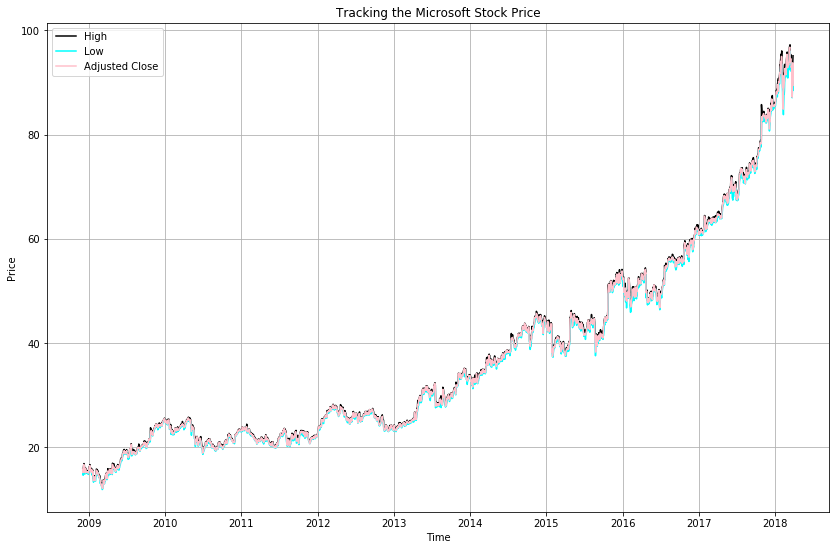

In [57]:
plt.figure(figsize=(14, 9))
plt.plot(df['AdjHigh'], label='High', color='black')
plt.plot(df['AdjLow'], label='Low', color='cyan')
plt.plot(df['AdjClose'], label='Adjusted Close', color='pink')
plt.grid(True)
plt.title('Tracking the Microsoft Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axis('tight')
#plt.tight_layout()
plt.legend()
plt.show()

The Python-syle API exploits the Object Oriented API style of Python. I've provided two illustrative examples below. Notice the difference in styles.
There's a bit more typing to do here. It may not appear obvious why this is a better method in the long run. Suffice to say that as you start producing more complex charts, the more explicit use of objects makes it more customizable to suit your needs.

We will not be using this method for today. However, I'm flagging it as a topic that can be explored as you get better at writing programs. [This](http://www.scipy-lectures.org/intro/matplotlib/index.html) is a good place to rev up your charting skills.

```python
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
### subplots() creates axes on a chart
for i in ['AdjHigh', 'AdjLow', 'AdjClose']:
    curr_label = i
    ax.plot(df[i], linewidth=0.5, label=curr_label)
ax.legend()
ax.grid()
ax.set
plt.show()


fig = plt.figure(figsize=(12, 9))
grid = plt.GridSpec(4, 4, wspace=0.25, hspace=0.35)
price_ax = fig.add_subplot(grid[0:3, :])
vol_ax = fig.add_subplot(grid[3, :])

price_ax.plot()
for i in ['High', 'Low', 'Adj Close']:
    curr_label = i
    price_ax.plot(df[i], linewidth=1, label=curr_label)
price_ax.legend()
price_ax.grid()

vol_ax.plot(df['Volume'])
vol_ax.grid()
plt.show()

```

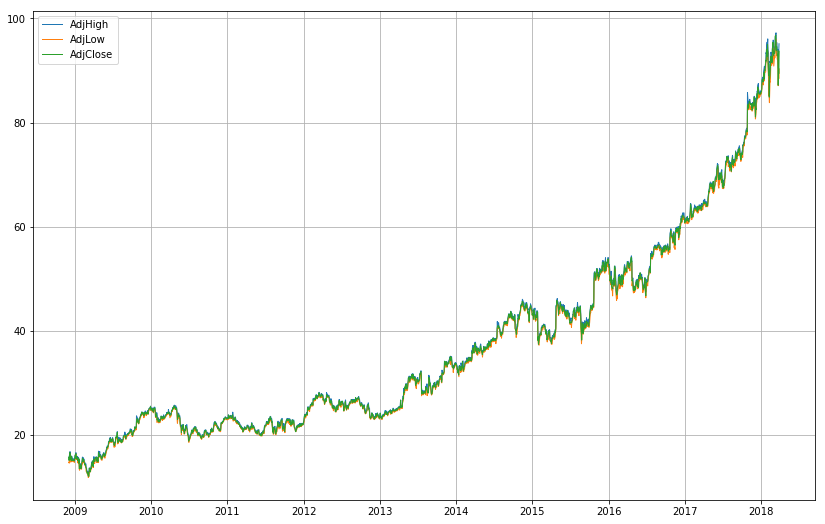

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
### subplots() creates axes on a chart
for i in ['AdjHigh', 'AdjLow', 'AdjClose']:
    curr_label = i
    ax.plot(df[i], linewidth=1, label=curr_label)
ax.legend()
ax.grid()
ax.set
plt.show()

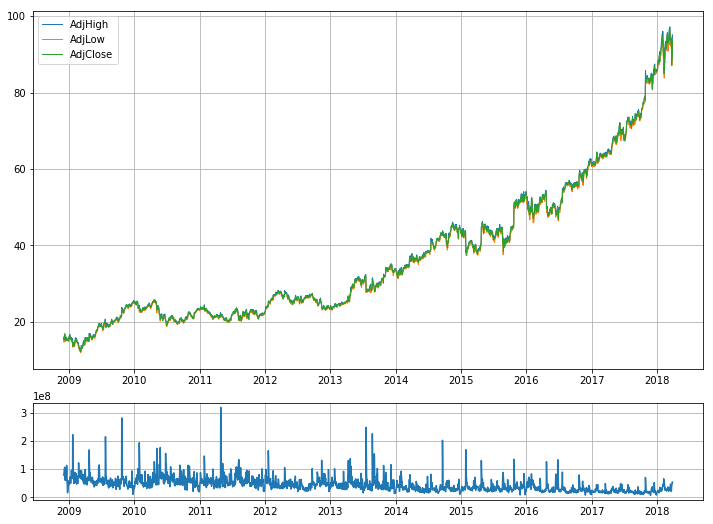

In [63]:
fig = plt.figure(figsize=(12, 9))
grid = plt.GridSpec(4, 4, wspace=0.25, hspace=0.35)
price_ax = fig.add_subplot(grid[0:3, :])
vol_ax = fig.add_subplot(grid[3, :])

price_ax.plot()
for i in ['AdjHigh', 'AdjLow', 'AdjClose']:
    curr_label = i
    price_ax.plot(df[i], linewidth=1, label=curr_label)
price_ax.legend()
price_ax.grid()

vol_ax.plot(df['Volume'])
vol_ax.grid()
plt.show()

An even quicker way to plot graphs when you're dealing with `pandas` is the `.plot()` method directly as shown. The `.plot()` method is a wrapper around `matplotlib's` `plot()` function.

```python

df[['AdjHigh', 'AdjLow', 'AdjClose']].plot(grid=True, linewidth=0.5, figsize=(14, 9 ))
df['AdjVolume'].plot(grid=True, linewidth=0.5, figsize=(14, 9))
```

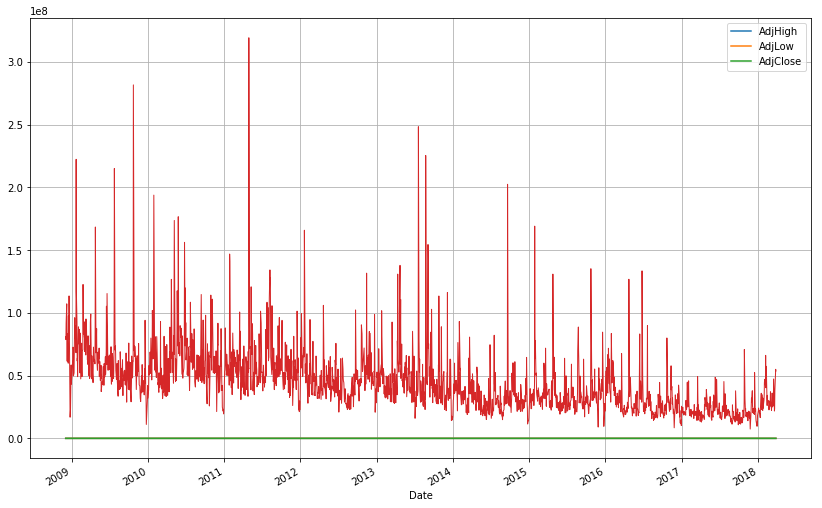

In [62]:
%matplotlib inline
df[['AdjHigh', 'AdjLow', 'AdjClose']].plot(grid=True, linewidth=1.5, figsize=(14, 9))
df['Volume'].plot(grid=True, linewidth=1, figsize=(14, 9))

### Strategy # 1: The Modified Faber Strategy

One of the most downloaded papers on the SSRN portal is [A Quantitative Approach to Tactical Asset Allocation](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=962461) by Meb Faber. We shall refer to this approach as the 'Faber strategy'.

We modify the Faber strategy to demonstrate a somewhat simplified version of the same.

We shall compute the 200-day Simple Moving Average (henceforth referred to as 'SMA200' or '10-month SMA') and compare it with the Close prices each day. There are two conditions which we shall check each day.

1. If the price is greater than the SMA200, we will buy one Microsoft stock. We shall then continue to stay invested until the Close price dips below SMA200.

2. When this happens, we will sell our MSFT stock and stay out of the market until our first condition is again satisfied.

Our trading rules can be stated as

* Buy when Price > 10-month SMA (since there are approx. 200 trading days in 10 months)
* Sell and move to Cash when Price < 10-month SMA





```python
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
```

In [64]:
df1 = df.copy()
df2 = df.copy()

```python
buyPrice = 0
sellPrice = 0
maWealth = 1.0
cash = 1
stock = 0
sma = 200

ma = np.round(df1['AdjClose'].rolling(window=sma, center=False).mean(), 2)
n_days = len(df1['AdjClose'])

# ma.iloc[sma-2:205]
```

In [65]:
buyPrice = 0
sellPrice = 0
maWealth = 1.0
cash = 1
stock = 0
sma = 200

ma = np.round(df1['AdjClose'].rolling(window=sma, center=False).mean(), 2)
n_days = len(df1['AdjClose'])

```python

closePrices = df1['AdjClose']

buy_data = []
sell_data = []

trade_price = []

wealth = []

for d in range(sma-1, n_days):
    # Buy if stock price > MA & if not bought yet
    if closePrices[d] > ma[d] and cash == 1:
        buyPrice = closePrices[d + 1]
        buy_data.append(buyPrice)
        trade_price.append(buyPrice)
        cash = 0
        stock = 1
        
    # Sell if stock price < MA and if you have a stock to sell
    
    if closePrices[d] < ma[d] and stock == 1:
        sellPrice = closePrices[d + 1]
        sell_data.append(sellPrice)
        trade_price.append(sellPrice)
        cash = 1
        stock = 0
        
        maWealth = maWealth * (sellPrice / buyPrice)
        wealth.append(maWealth)

tp = pd.DataFrame(trade_price)
wealth.insert(0, 1)
w = pd.DataFrame(wealth)
plt.plot(w)
```

In [67]:
closePrices = df1['AdjClose']

buy_data = []
sell_data = []

trade_price = []

wealth = []

for d in range(sma-1, n_days):
    # Buy if stock price > MA & if not bought yet
    if closePrices[d] > ma[d] and cash == 1:
        buyPrice = closePrices[d + 1]
        buy_data.append(buyPrice)
        trade_price.append(buyPrice)
        cash = 0
        stock = 1

    # Sell if stock price < MA and if you have a stock to sell

    if closePrices[d] < ma[d] and stock == 1:
        sellPrice = closePrices[d + 1]
        sell_data.append(sellPrice)
        trade_price.append(sellPrice)
        cash = 1
        stock = 0

        maWealth = maWealth * (sellPrice / buyPrice)
        wealth.append(maWealth)

In [68]:
len(wealth)

31

In [71]:
wealth

[1,
 1.0752180679903365,
 1.028503591870995,
 0.99210509131195157,
 0.98405788894905122,
 0.97599184067897782,
 0.9565839723365952,
 0.93591479628535734,
 0.93881798293533925,
 0.95274268369709192,
 0.94029331734593125,
 0.9017625009584348,
 0.89041308733083968,
 0.84202837617023218,
 0.80516920063029263,
 0.80325819778066676,
 0.80451035397362836,
 0.93917901061305353,
 0.93024660154472738,
 0.92808165594736547,
 0.92590525005401458,
 1.3991308894400509,
 1.3980202162458679,
 1.2934569307241783,
 1.1894966875939865,
 1.3198198741744391,
 1.322206049117693,
 1.3472928425401338,
 1.371248461063207,
 1.3109998237678429,
 1.3346538704018098,
 1.2971560695075202]

In [70]:
wealth.insert(0, 1)

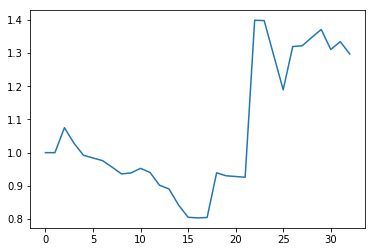

In [73]:
tp = pd.DataFrame(trade_price)
wealth.insert(0, 1)
w = pd.DataFrame(wealth)
plt.plot(w)

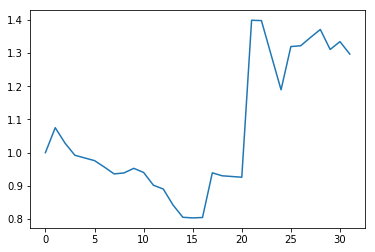

In [72]:
w = pd.DataFrame(wealth)
plt.plot(w)

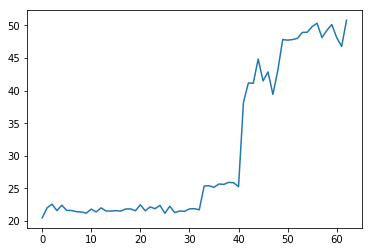

In [74]:
plt.plot(tp)

Plotting the 10-month SMA and the Close prices

```python

df1['SMA200'] = ma

plt.figure(figsize=(14, 9))
plt.plot(df1['AdjClose'], linewidth=0.5, label='Adjusted Close')
plt.plot(df1['SMA200'], linewidth=0.5, label='200-day Moving Average')
plt.grid(True)
plt.title('Microsoft Stock Price History')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axis('tight')
#plt.tight_layout()
plt.legend()
plt.show()
# %matplotlib inline
# %matplotlib qt
```


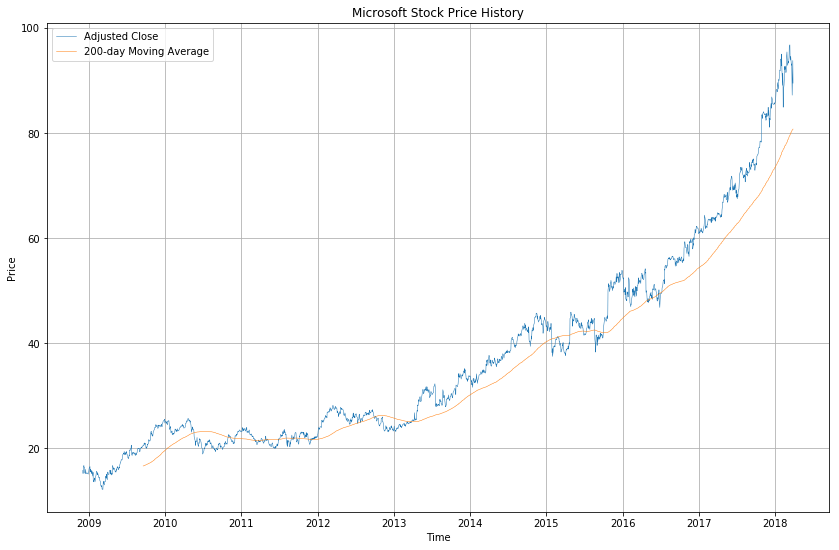

In [76]:
df1['SMA200'] = ma

plt.figure(figsize=(14, 9))
plt.plot(df1['AdjClose'], linewidth=0.5, label='Adjusted Close')
plt.plot(df1['SMA200'], linewidth=0.5, label='200-day Moving Average')
plt.grid(True)
plt.title('Microsoft Stock Price History')
plt.xlabel('Time')
plt.ylabel('Price')
#plt.axis('tight')
#plt.tight_layout()
plt.legend()
plt.show()

### Strategy # 2: The Moving Average Crossover Strategy

This is a well-known trading technique and considered to be the 'Hello World' of algorithmic/quantitative trading. It's essentially a way to take advantage of the momentum or trend in stock price movements.

We shall have two SMA filters viz. the shorter lookback period SMA (henceforth referred to as  'SMA50') and the longer lookback period SMA (henceforth referred to as 'SMA150'). We will go long on Microsoft *at the first instance* when the SMA50 exceeds the SMA150. Similarly, we will go short on Microsoft, *at the first instance* when the SMA150 exceeds the SMA50. This strategy can work well when the price movements of the asset trend in a particular direction (upwards or downwards) persistently before slowly reversing their drift.

Our trading rules can be stated as

* Go long when SMA50 > SMA150 on a given day and SMA50 < SMA150 on the previous day
* Go short when SMA50 < SMA150 on a given day and SMA50 > SMA150 on the previous day



```python

m = 50 # defining the shorter lookback period
n = 150 # defining the longer lookback period

df2['SMA50'] = df2['AdjClose'].rolling(window=m, center=False).mean()
df2['SMA150'] = df2['AdjClose'].rolling(window=n, center=False).mean()
```

In [100]:
df2 = df.copy()

We'll now plot the key variables and see how they look.
```python

df2[['AdjClose', 'SMA50', 'SMA150']].plot(grid=True, linewidth=0.5)
```

In [77]:
df2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2008-12-03,18.65,19.90,18.60,19.87,80961500.0,0.0,1.0,14.807090,15.799522,14.767393,15.775704,80961500.0
2008-12-04,19.40,19.92,18.79,19.11,78719200.0,0.0,1.0,15.402549,15.815401,14.918242,15.172305,78719200.0
2008-12-05,18.91,19.98,18.47,19.87,91996200.0,0.0,1.0,15.013516,15.863038,14.664180,15.775704,91996200.0
2008-12-08,20.35,21.25,20.14,21.01,107225000.0,0.0,1.0,16.156798,16.871349,15.990069,16.680802,107225000.0
2008-12-09,20.62,21.25,20.46,20.60,80484900.0,0.0,1.0,16.371163,16.871349,16.244132,16.355284,80484900.0


In [ ]:
#df2.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend'], axis=1, inplace=True)

```python

df2['SMA50_2'] = df2['AdjClose'].rolling(window=m, center=False).mean().shift(1)
df2['SMA150_2'] = df2['AdjClose'].rolling(window=n, center=False).mean().shift(1)
```

We've now computed all of what we need to generate trading signals. Let's go ahead and now do that.


In [78]:
m = 50 # defining the shorter lookback period
n = 150 # defining the longer lookback period

df2['SMA50'] = df2['AdjClose'].rolling(window=m, center=False).mean()
df2['SMA150'] = df2['AdjClose'].rolling(window=n, center=False).mean()

df2['SMA50_2'] = df2['AdjClose'].rolling(window=m, center=False).mean().shift(1)
df2['SMA150_2'] = df2['AdjClose'].rolling(window=n, center=False).mean().shift(1)

In [85]:
df2['Signal'] = np.where((df2['SMA50'] > df2['SMA150']) 
                        & (df2['SMA50_2'] < df2['SMA150_2']), 1, 0)
df2['Signal'] = np.where((df2['SMA50'] < df2['SMA150']) 
                        & (df2['SMA50_2'] > df2['SMA150_2']), -1, df2['Signal'])


In [86]:
df2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,SMA50,SMA150,SMA50_2,SMA150_2,Signal
Date,,,,,,,,,,,,,,,,,
2008-12-03,18.65,19.90,18.60,19.87,80961500.0,0.0,1.0,14.807090,15.799522,14.767393,15.775704,80961500.0,NaN,NaN,NaN,NaN,0
2008-12-04,19.40,19.92,18.79,19.11,78719200.0,0.0,1.0,15.402549,15.815401,14.918242,15.172305,78719200.0,NaN,NaN,NaN,NaN,0
2008-12-05,18.91,19.98,18.47,19.87,91996200.0,0.0,1.0,15.013516,15.863038,14.664180,15.775704,91996200.0,NaN,NaN,NaN,NaN,0
2008-12-08,20.35,21.25,20.14,21.01,107225000.0,0.0,1.0,16.156798,16.871349,15.990069,16.680802,107225000.0,NaN,NaN,NaN,NaN,0
2008-12-09,20.62,21.25,20.46,20.60,80484900.0,0.0,1.0,16.371163,16.871349,16.244132,16.355284,80484900.0,NaN,NaN,NaN,NaN,0


A note on `numpy.where()`: This method has two modes of operation.

1) **We only specify the condition here**: It checks for the truth value of the specified condition in the parentheses. If it is `True`, it returns the indices of the `NumPy` array.

2) **We specify the condition and also two additional arguments**: It again checks for the truth value as the previous condition. However, it would return the first argument if `True` else it would return the second argument.

```python
df2['Signal'] = np.where((df2['SMA50'] > df2['SMA150']) 
                        & (df2['SMA50_2'] < df2['SMA150_2']), 1, 0)
df2['Signal'] = np.where((df2['SMA50'] < df2['SMA150']) 
                        & (df2['SMA50_2'] > df2['SMA150_2']), -1, df2['Signal'])
```

In [82]:
a = np.array([1, 3, 4, 5, 8, 10, 11])

In [83]:
np.where(a > 6)

(array([4, 5, 6], dtype=int64),)

In [84]:
np.where(a > 6, "Yes", "No")

array(['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes'], 
      dtype='<U3')

In [88]:
df2['Buy'] = df2.apply(lambda x : x['AdjClose'] if x['SMA50'] > x['SMA150'] 
                        and x['SMA50_2'] < x['SMA150_2'] else 0, axis=1)

df2['Sell'] = df2.apply(lambda y : -y['AdjClose'] if y['SMA50'] < y['SMA150'] 
                        and y['SMA50_2'] > y['SMA150_2'] else 0, axis=1)

df2['TP'] = df2['Buy'] + df2['Sell']
df2['TP']=df2['TP'].replace(to_replace=0, method='ffill')

df2['Position'] = df2['Signal'].replace(to_replace=0, method= 'ffill')
k = df2['TP'].nonzero()

In [116]:
frame2 = df2.iloc[k[0]]

In [90]:
frame = df2.iloc[k]

In [ ]:
type(k) # this tells us k is a tuple

k[0] #this gives us a numpy array
type(k[0]) #confirms that this is a numpy ndarray
len(k[0]) # total number of positions

frame = df2.iloc[k]

In [91]:
frame.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,...,AdjVolume,SMA50,SMA150,SMA50_2,SMA150_2,Signal,Buy,Sell,TP,Position
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-03,26.55,26.93,26.41,26.86,67837000.0,0.0,1.0,21.775017,22.086674,21.660195,...,67837000.0,23.871719,23.897028,23.919038,23.904401,-1,0.0,-22.029264,-22.029264,-1
2010-06-04,26.10,26.57,25.62,25.79,89832200.0,0.0,1.0,21.405949,21.791420,21.012276,...,89832200.0,23.810604,23.886880,23.871719,23.897028,0,0.0,0.000000,-22.029264,-1
2010-06-07,25.82,25.83,25.24,25.29,80456200.0,0.0,1.0,21.176306,21.184508,20.700618,...,80456200.0,23.735409,23.872919,23.810604,23.886880,0,0.0,0.000000,-22.029264,-1
2010-06-08,25.25,25.26,24.65,25.11,87355000.0,0.0,1.0,20.708820,20.717021,20.216729,...,87355000.0,23.662977,23.860617,23.735409,23.872919,0,0.0,0.000000,-22.029264,-1
2010-06-09,25.22,25.52,24.75,24.79,87794000.0,0.0,1.0,20.684215,20.930261,20.298744,...,87794000.0,23.586439,23.845756,23.662977,23.860617,0,0.0,0.000000,-22.029264,-1


In [89]:
df2['Signal'].value_counts()
# In the period, we've chosen, this is in line with what we see in k

 0    2329
 1       7
-1       7
Name: Signal, dtype: int64

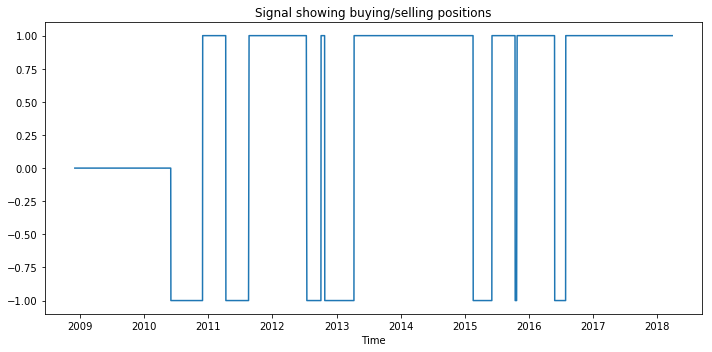

In [100]:
# Alternate way to plot the graph
plt.figure(figsize=(10, 5))
plt.plot(df2['Position'])
plt.title("Signal showing buying/selling positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show()

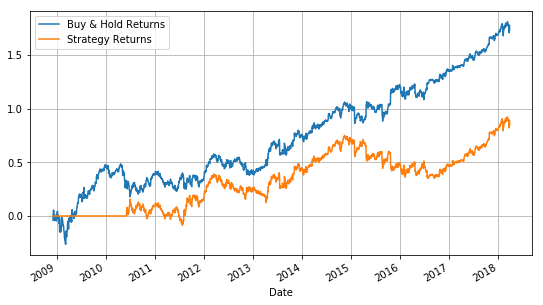

In [94]:
df2['Buy & Hold Returns'] = np.log(df2['AdjClose'] / df2['AdjClose'].shift(1))
df2['Strategy Returns'] = df2['Buy & Hold Returns'] * df2['Position'].shift(1)

df2[['Buy & Hold Returns', 'Strategy Returns']].cumsum().plot(grid=True, figsize=(9,5))


### Downloading Data for Multiple Stocks

We can download data for stocks in multiple ways using the APIs provided by data vendors.
Data vendors provide the the data in different formats and so the methods used to download it, and clean it vary slightly. I've adapted the approach from [here](https://gist.github.com/CNuge).

Please ensure that your `pandas-datareader` is installed and working.

```python

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from concurrent import futures
```
The `futures` module in the library `concurrent` provides a high level API to perform parallel tasks. This works like a charm when you have a lot of data to download since it can happen in parallel.



In [95]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from concurrent import futures

In [98]:
def download_stocks(stock):
    try:
        print('Trying to retrieve the %s symbol...\n' % (stock))
        stock_df = web.DataReader(stock, 'yahoo', start, end)
        stock_df['Name'] = stock
        output_name = stock + '.csv'
        list_stocks.append(output_name)
        stock_df.to_csv(output_name)
        print('Symbol %s downloaded OK.\n' % (stock))
    except:
        bad_tickers.append(stock)
        print('Problems downloading the %s symbol.\n' % (stock))

In [99]:
%%time
stocksList = ['MSFT', 'AAPL', 'IBM', 'DELL', 'HP', 
              'TSLA', 'AMZN', 'AIG', 'STJ', 'WMT', 
              'LVLT', 'SBUX', 'CL', 'NKE', 'FOSL']
list_stocks = []

### Keeping track of failed ticker download queries
bad_tickers = []

end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 5)

# We use the concurrent.futures module's ThreadPoolExecutor 
# to speed up the downloads by doing them in parallel rather than serially
    
### Set the maximum thread number
max_workers = 50

workers = min(max_workers, len(stocksList)) 
### In case a smaller number of stocks than threads was passed in
with futures.ThreadPoolExecutor(workers) as executor:
    res = executor.map(download_stocks, stocksList)
### map allows multiple calls to the given function. It passes each of the items in stocksList (any 
### iterable) to the function. Here, it can happen concurrently because of the ThreadPoolExecutor()
### subClass

Trying to retrieve the MSFT symbol...

Trying to retrieve the AAPL symbol...

Trying to retrieve the IBM symbol...

Trying to retrieve the DELL symbol...

Trying to retrieve the HP symbol...

Trying to retrieve the TSLA symbol...

Trying to retrieve the AMZN symbol...

Trying to retrieve the AIG symbol...

Trying to retrieve the STJ symbol...

Trying to retrieve the WMT symbol...

Trying to retrieve the LVLT symbol...

Trying to retrieve the SBUX symbol...

Trying to retrieve the CL symbol...

Trying to retrieve the NKE symbol...

Trying to retrieve the FOSL symbol...

Problems downloading the DELL symbol.

Symbol STJ downloaded OK.

Symbol AMZN downloaded OK.

Symbol FOSL downloaded OK.

Symbol AIG downloaded OK.

Symbol AAPL downloaded OK.

Symbol MSFT downloaded OK.

Symbol TSLA downloaded OK.

Symbol CL downloaded OK.

Symbol SBUX downloaded OK.

Symbol NKE downloaded OK.

Symbol WMT downloaded OK.

Symbol HP downloaded OK.

Symbol IBM downloaded OK.

Problems downloading the LVLT 

#### References

1. The `pandas-datareader` library documentation - http://pandas-datareader.readthedocs.io/en/latest/#
2. The Python `datetime` documentation - https://docs.python.org/3/library/datetime.html#module-datetime
3. The `dateutil` library documentation - https://dateutil.readthedocs.io/en/stable/
4. Examples for dealing with dates and times in Python - https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
3. Faber, Meb, A Quantitative Approach to Tactical Asset Allocation (February 1, 2013). The Journal of Wealth Management, Spring 2007 . Available at SSRN: https://ssrn.com/abstract=962461
3. Documentation on the `.nonzero()` method in `NumPy` : https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.nonzero.html
4. Documentation on `pandas DataFrame .apply()` function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html
5. https://stackoverflow.com/
6. `MatPlotlib` tutorial - http://www.scipy-lectures.org/intro/matplotlib/index.html
